In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-prediction/crop yield data sheet.xlsx


In [2]:
# import libraries

In [76]:
import pandas as pd
import numpy as np

In [138]:
df = pd.read_excel('/kaggle/input/crop-yield-prediction/crop yield data sheet.xlsx')

In [139]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [141]:
# Data Cleaning

In [142]:
# Read CSV FILES 

df = pd.read_excel('/kaggle/input/crop-yield-prediction/crop yield data sheet.xlsx')

In [143]:
# Clean Rows 

# Removes rows in number 99 -109, because this excel files not provided data

In [144]:
df = df.iloc[lambda x: ~x.index.isin(range(99, 110))]  # Using boolean indexing

In [145]:
print(df)

    Rain Fall (mm)  Fertilizer Temperatue  Nitrogen (N)  Phosphorus (P)  \
0           1230.0        80.0         28          80.0            24.0   
1            480.0        60.0         36          70.0            20.0   
2           1250.0        75.0         29          78.0            22.0   
3            450.0        65.0         35          70.0            19.0   
4           1200.0        80.0         27          79.0            22.0   
..             ...         ...        ...           ...             ...   
94          1250.0        77.0         28          78.0            23.0   
95           425.0        60.0         39          65.0            19.0   
96          1220.0        79.0         28          77.0            23.0   
97           480.0        65.0         36          68.0            21.0   
98          1230.0        80.0         28          80.0            24.0   

    Potassium (K)  Yeild (Q/acre)  
0            20.0            12.0  
1            18.0          

In [146]:
# Save the cleaned DataFrame to a CSV file

df.to_csv('cleaned_crop_yield_data.csv', index=False)

In [154]:
# First, let's check the unique values in the 'Temperatue' column to understand its content

df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40], dtype=object)

In [6]:
import numpy as np

import pandas as pd

df = pd.read_excel('/kaggle/input/crop-yield-prediction/crop yield data sheet.xlsx')

# Convert the 'Temperatue' column to a numpy array
temperature_array = df['Temperatue'].to_numpy()

# Identify non-numeric values (in this case, anything that is not a number) and replace with NaN
# Since ':' was the only non-numeric value identified, we focus on numeric conversion and NaN replacement
# Attempt to convert to float, and use np.nan for errors
temperature_converted = np.where(temperature_array.astype(str) == ':', np.nan, temperature_array)
temperature_converted = temperature_converted.astype(float)

# Replace the original 'Temperatue' column in the dataframe with this cleaned, numeric array
df['Temperatue'] = temperature_converted

# Re-check the data types of all columns to ensure 'Temperatue' is now correctly typed as float
df.dtypes

Rain Fall (mm)    float64
Fertilizer        float64
Temperatue        float64
Nitrogen (N)      float64
Phosphorus (P)    float64
Potassium (K)     float64
Yeild (Q/acre)    float64
dtype: object

In [7]:
# correct word temperatue to temperature

df.rename(columns={'Temperatue': 'Temperature'}, inplace=True)

In [8]:
df

,Rain Fall (mm),Fertilizer,Temperature,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.iloc[lambda x: ~x.index.isin(range(99, 110))]

In [10]:
df

,Rain Fall (mm),Fertilizer,Temperature,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0,20.0,9.0
95,425.0,60.0,39.0,65.0,19.0,17.0,6.5
96,1220.0,79.0,28.0,77.0,23.0,21.0,10.5
97,480.0,65.0,36.0,68.0,21.0,16.0,7.0


In [11]:
# Save the cleaned DataFrame to a CSV file

df.to_csv('cleaned_crop_yield_data.csv', index=True)

In [13]:
df

,Rain Fall (mm),Fertilizer,Temperature,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0,20.0,9.0
95,425.0,60.0,39.0,65.0,19.0,17.0,6.5
96,1220.0,79.0,28.0,77.0,23.0,21.0,10.5
97,480.0,65.0,36.0,68.0,21.0,16.0,7.0


In [14]:
df_encoded = pd.get_dummies(df, columns=['Yeild (Q/acre)'])

In [15]:
df_encoded

,Rain Fall (mm),Fertilizer,Temperature,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)_5.5,Yeild (Q/acre)_6.0,Yeild (Q/acre)_6.5,Yeild (Q/acre)_7.0,Yeild (Q/acre)_7.5,Yeild (Q/acre)_8.0,Yeild (Q/acre)_8.5,Yeild (Q/acre)_9.0,Yeild (Q/acre)_9.5,Yeild (Q/acre)_10.0,Yeild (Q/acre)_10.5,Yeild (Q/acre)_11.0,Yeild (Q/acre)_12.0
0,1230.0,80.0,28.0,80.0,24.0,20.0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,480.0,60.0,36.0,70.0,20.0,18.0,False,False,False,False,False,True,False,False,False,False,False,False,False
2,1250.0,75.0,29.0,78.0,22.0,19.0,False,False,False,False,False,False,False,False,False,False,False,True,False
3,450.0,65.0,35.0,70.0,19.0,18.0,False,False,False,False,False,False,False,True,False,False,False,False,False
4,1200.0,80.0,27.0,79.0,22.0,19.0,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0,20.0,False,False,False,False,False,False,False,True,False,False,False,False,False
95,425.0,60.0,39.0,65.0,19.0,17.0,False,False,True,False,False,False,False,False,False,False,False,False,False
96,1220.0,79.0,28.0,77.0,23.0,21.0,False,False,False,False,False,False,False,False,False,False,True,False,False
97,480.0,65.0,36.0,68.0,21.0,16.0,False,False,False,True,False,False,False,False,False,False,False,False,False


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

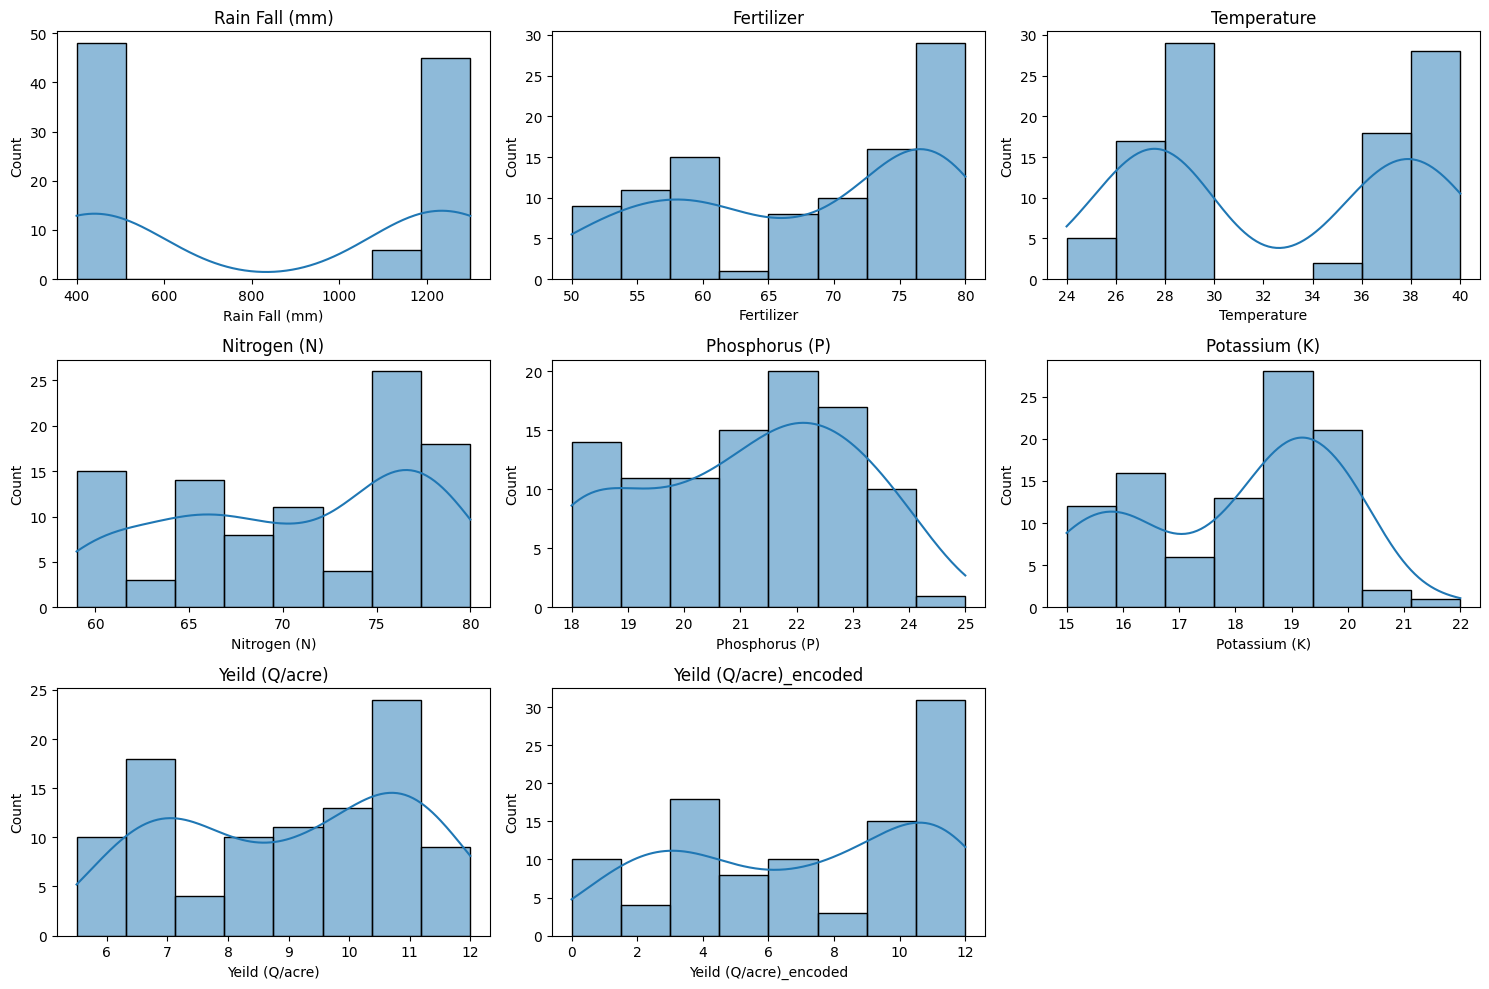

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_statistics = df.describe()

# Visualizations: Histograms for distribution of variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

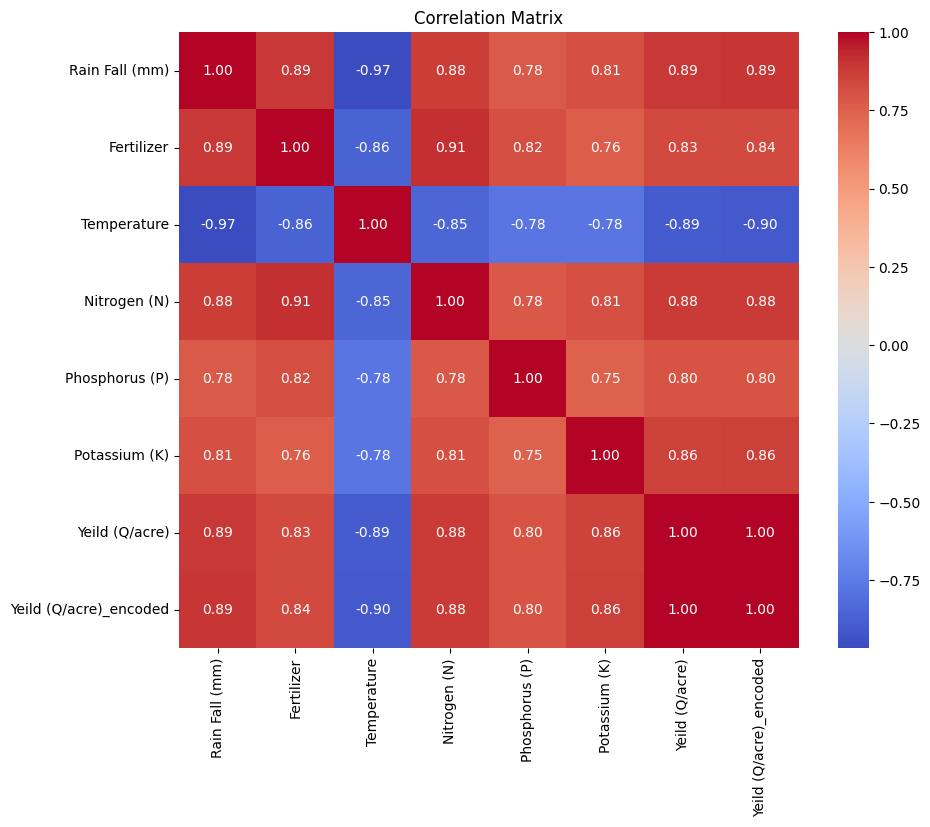

In [22]:
# Impute missing values with the median of each column
df_imputed = df.fillna(df.median())

# Verify if all missing values are addressed
missing_values_after_imputation = df_imputed.isnull().sum()

# Perform correlation analysis
correlation_matrix = df_imputed.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()